Siti Muslimah KHN - 19/442489/PA/19238

Assignment 1 : Data Exploration

Data source : https://www.kaggle.com/c/titanic

In [1]:
# preparing the data
import pandas as pd 
import numpy as np 
data = pd.read_csv('train.csv')
data.replace('?', np.nan, inplace=True)
data = data.astype({"Age":np.float64, "Fare":np.float64})

In [2]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# descriptive statistic of age
mean = data["Age"].mean()
median = data["Age"].median()
modus = data["Age"].mode()
varian = data["Age"].var()
stDev = data["Age"].std()
print ("Mean of passengers's age:", mean)
print ("Median of passengers's age:", median)
print ("Mode of passengers's age:", modus)
print ("Variance of passengers's age:", varian)
print ("standard deviation of passengers's age:", stDev)

Mean of passengers's age: 29.69911764705882
Median of passengers's age: 28.0
Mode of passengers's age: 0    24.0
dtype: float64
Variance of passengers's age: 211.01912474630802
standard deviation of passengers's age: 14.526497332334042


In [5]:
# descriptive statistic of fare
mean = data["Fare"].mean()
median = data["Fare"].median()
modus = data["Fare"].mode()
varian = data["Fare"].var()
stDev = data["Fare"].std()
print ("Mean of passengers's fare:", mean)
print ("Median of passengers's fare:", median)
print ("Mode of passengers's fare:", modus)
print ("Variance of passengers's fare:", varian)
print ("standard deviation of passengers's fare:", stDev)

Mean of passengers's fare: 32.204207968574636
Median of passengers's fare: 14.4542
Mode of passengers's fare: 0    8.05
dtype: float64
Variance of passengers's fare: 2469.436845743116
standard deviation of passengers's fare: 49.6934285971809


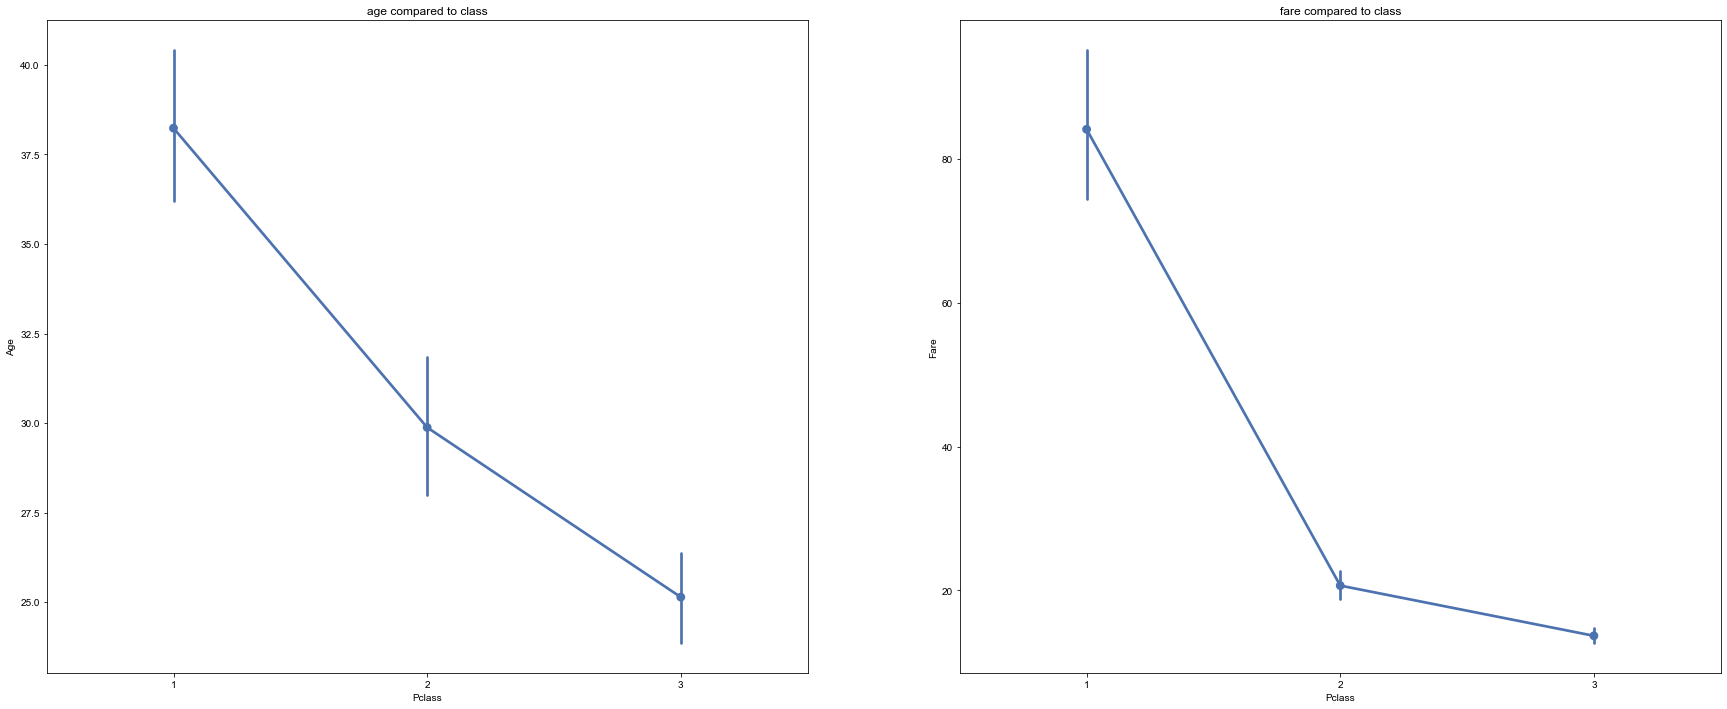

In [6]:
# Data visualization of some features
import seaborn as sns 
import matplotlib.pyplot as plt 
fig, axs = plt.subplots(ncols=2, figsize=(30,12))
sns.set_theme()
sns.pointplot(x="Pclass", y="Age", data=data, ax=axs[0]).set(title="age compared to class")
sns.pointplot(x="Pclass", y="Fare", data=data, ax=axs[1]).set(title="fare compared to class")
plt.show()

1. Can be seen that elderly people tend to buy the first class
2. The fare of first class are the highest while the third class are the lowest

In [7]:
from scipy.stats import pearsonr
data["Age"].fillna(value=data["Age"].mean(), inplace=True)
data["Survived"].fillna(value=data["Survived"].mean(), inplace=True)
corr, _ = pearsonr(data["Age"],data["Survived"])
print ('Pearsons correlation of age and survival rate: %.4f' % corr)

Pearsons correlation of age and survival rate: -0.0698


In [8]:
data["FamilySize"] = data["SibSp"] + data["Parch"] + 1
corr, _ = pearsonr(data["Survived"], data["FamilySize"])
print('Pearsons correlation of family size and survival rate: %.4f' % corr)

Pearsons correlation of family size and survival rate: 0.0166


In [9]:
data["Fare"].fillna(value=data["Fare"].mean(), inplace=True)
corr, _ = pearsonr(data["Survived"], data["Fare"])
print('Pearsons correlation of fare and survival rate: %.4f' % corr)

Pearsons correlation of fare and survival rate: 0.2573


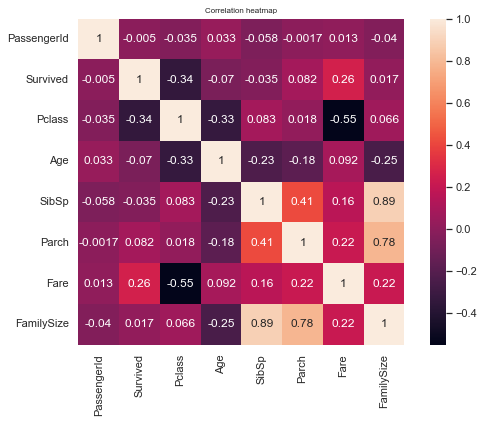

In [10]:
# create the heatmap plot
corr_mat = data.corr()
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr_mat, annot=True, square=True)
plt.title("Correlation heatmap", size=8)
plt.show()

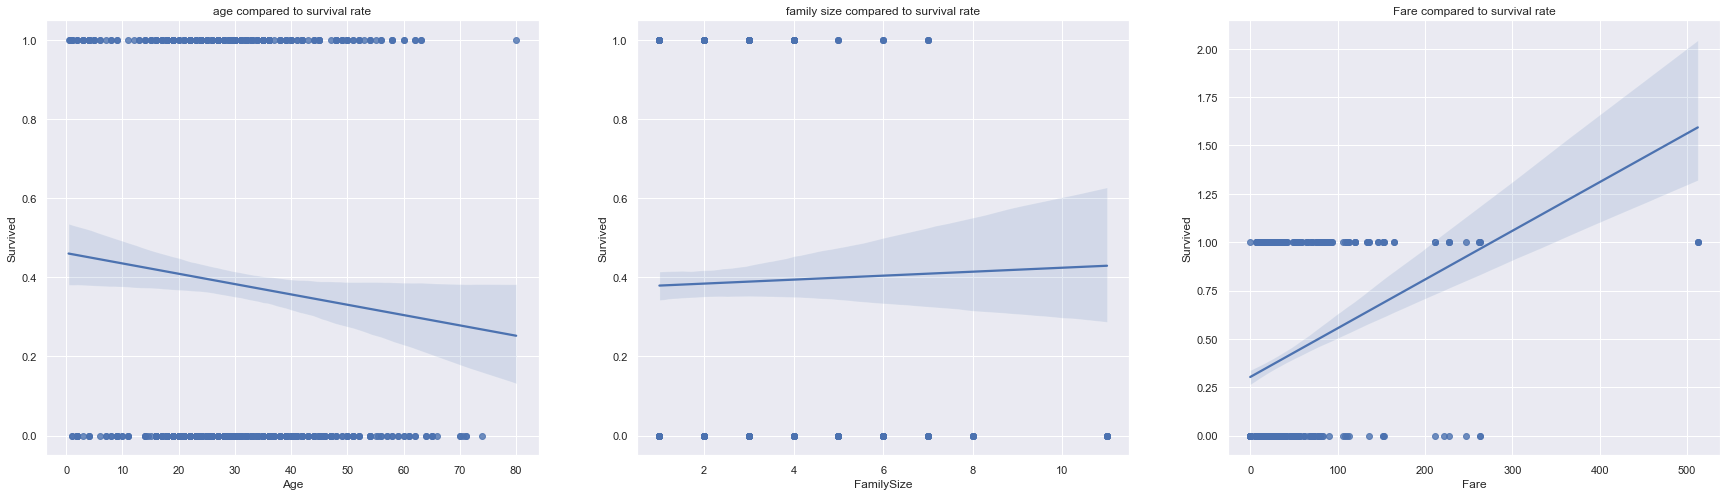

In [11]:
# Data visualization of correlation between feature and target
fig, axs = plt.subplots(ncols=3, figsize=(30,8))
sns.regplot(x="Age", y="Survived", data=data, ax=axs[0]).set(title="age compared to survival rate")
sns.regplot(x="FamilySize", y="Survived", data=data, ax=axs[1]).set(title="family size compared to survival rate")
sns.regplot(x="Fare", y="Survived", data=data, ax=axs[2]).set(title="Fare compared to survival rate")
plt.show()

1. Age has weak negative correlation with the survival rate
2. Family size has weak positive correlation with the survival rate
3. Fare has correlation weak positive with the survival rate

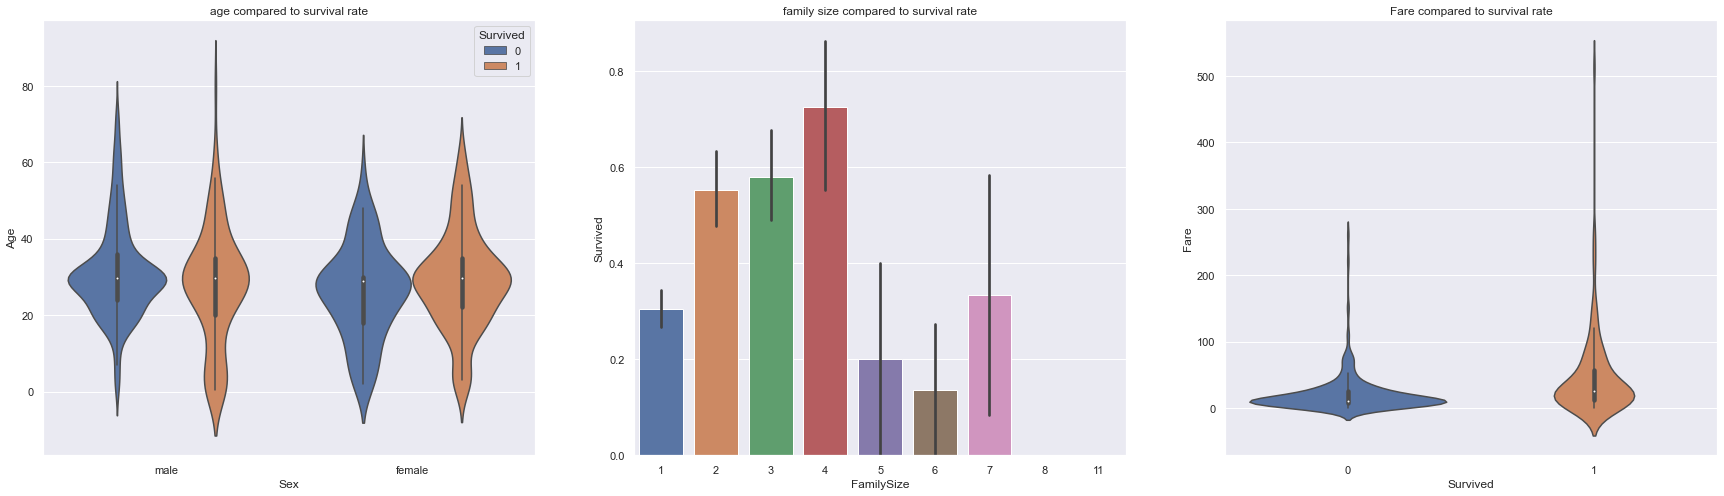

In [12]:
# Data visualization of correlation between feature and target
fig, axs = plt.subplots(ncols=3, figsize=(30,8))
sns.violinplot(x="Sex", y="Age", hue="Survived", data=data, ax=axs[0]).set(title="age compared to survival rate")
sns.barplot(x="FamilySize", y="Survived", data=data, ax=axs[1]).set(title="family size compared to survival rate")
sns.violinplot(x="Survived", y="Fare", data=data, ax=axs[2]).set(title="Fare compared to survival rate")
plt.show()

1. Age are not really have correlation with the survival rate
2. Family with less than 5 members has higher survival rate
3. People that has higher fare tend to survive